In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import average, dendrogram
from scipy.spatial.distance import pdist, squareform

In [17]:
df = pd.read_csv("../Fold-change/Resultados-Fold-Change/GSE147507/fold_change_genes_1_GSE147507.csv")
df.index = df['Unnamed: 0']
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.index.names = ['Genes']

In [27]:
df

,fold-change Series1,fold-change Series2,fold-change Series5,fold-change Series6,fold-change Series7,fold-change Series9 NHBE_IFNB_4h,fold-change Series9 NHBE_IFNB_6h,fold-change Series9 NHBE_IFNB_12h,fold-change Series15,fold-change Series16 A549-ACE2_SARS-CoV-2,fold-change Series16 A549-ACE2_SARS-CoV-2_Rux
Genes,,,,,,,,,,,
DUOX1,-0.167938,0.130372,0.000000,0.000000,3.680230,-0.600170,-0.748791,-0.925573,1.236842,2.161675,2.431973
ADAR,0.182160,0.685738,0.254281,0.157392,1.984468,1.259580,1.938170,1.853142,1.128040,1.876016,0.869342
ANXA1,0.289965,0.346207,-0.089897,-0.876357,-0.050257,-0.615062,-0.394590,-0.663930,-1.121906,-0.625737,-0.592316
ANXA2,0.170070,0.026337,-0.072759,-1.306351,-0.030658,0.300406,0.230683,0.132907,-0.304444,-0.903687,-0.722669
BST2,1.190147,2.568283,-0.957537,-0.907026,4.311469,3.408031,4.421805,6.067895,-0.215897,3.682049,0.597904
...,...,...,...,...,...,...,...,...,...,...,...
HMGB1,-0.173813,0.296970,0.072023,-0.168559,-0.227119,0.349668,0.490822,0.316674,-1.156957,-0.054169,0.292018
RAN,0.185871,0.106573,-0.058374,0.080260,-0.165435,0.163854,0.346439,0.300089,-1.042670,0.726380,0.905294
P2RY6,1.031749,-0.137964,-0.077963,-0.458964,3.319633,0.606290,0.228773,-0.744362,1.017637,0.218833,-0.650814


In [28]:
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)

In [47]:
# calculate the pairwise distances between the points
distances = pdist([df[col] for col in df.columns], metric='euclidean')

# convert the distance vector to a distance matrix
matrix = squareform(distances)

In [48]:
# perform UPGMA clustering
linkage_matrix = average(distances)

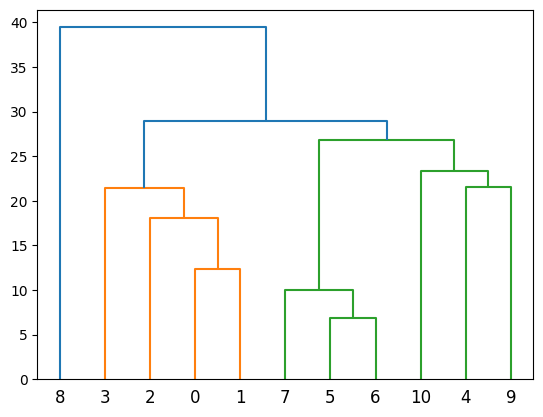

In [49]:
# plot the dendrogram
dend = dendrogram(linkage_matrix)

In [16]:
len(df)

256